<a href="https://colab.research.google.com/github/yohanesvalen18/Data-Science-Project-Yohanes/blob/main/YohanesGabrielValentinoManurung_Stage_2_Data_Preprocessing_(tanpa_PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HOMEWORK DATA PRE-PROCESSING

## Preparation

In [ ]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle
from pathlib import Path

%matplotlib inline
matplotlib.style.use('ggplot')


In [ ]:
df_train_raw = pd.read_csv('https://raw.githubusercontent.com/ChangCorp/finalproject/main/train_delimited_comma.csv')
df_test_raw = pd.read_csv('https://raw.githubusercontent.com/ChangCorp/finalproject/main/test_delimited_comma.csv')

In [ ]:
# menyalin dataset agar tidak mengubah dataset raw
df_train = df_train_raw.copy()
df_test = df_test_raw.copy()

In [ ]:
# mengubah nama kolom 'y' menjadi 'subscribed' untuk menghindari kebingungan saat modeling dan validation
df_train=df_train.rename(columns = {'y':'subscribed'})
df_test=df_test.rename(columns = {'y':'subscribed'})

## Data Cleansing

### A. Handle Missing Value

#### 1. TRAIN DATA SET

In [ ]:
# mengetahui missing value
df_train.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


* Tidak ditemukan missing value namun terdapat nilai *unknown* pada kolom `job`, `education`, `contact`, dan `poutcome`. <br>
* Kolom `job`, `education`, `contact` memikliki unknown yang relatif tidak banyak, akan diisi dengan nilai mode. <br>
* Kolom `poutcome` memiliki *unknown* sekitar 37k records, akan di-feature encoding menjadi poutcome_success 0 1, <br>

##### Handling *Unknown* value `job`

In [ ]:
df_train1=df_train.groupby(['education','job']).agg({'job':['count']})

df_train1=df_train1.reset_index() #diperlukan supaya bisa ganti nama kolom
df_train1.columns=['education','job','count']
df_train1.head()

,education,job,count
0,primary,admin.,209
1,primary,blue-collar,3758
2,primary,entrepreneur,183
3,primary,housemaid,627
4,primary,management,294


In [ ]:
# Mengambil mode job untuk tiap education
df_train1["rank"]=df_train1.groupby('education')['count'].rank(method="dense", ascending=False)
df_train1[df_train1['rank']==1].sort_values(['education'],ascending=[True])

,education,job,count,rank
1,primary,blue-collar,3758,1.0
13,secondary,blue-collar,5371,1.0
28,tertiary,management,7801,1.0
37,unknown,blue-collar,454,1.0


RUMPANG 7 : MENGUBAH VALUES

1. Kolom 'job' yang memiliki value 'unknown' akan diubah menjadi "blue-collar" jika kolom 'education' nya bernilai "primary"
2. Kolom 'job' yang memiliki value 'unknown' akan diubah menjadi "blue-collar" jika kolom 'education' nya bernilai "secondary"
3. Kolom 'job' yang memiliki value 'unknown' akan diubah menjadi "management" jika kolom 'education' nya bernilai "tertiary"
4. Kolom 'job' yang memiliki value 'unknown' akan diubah menjadi "blue-collar" jika kolom 'education' nya bernilai "unknown"

In [ ]:
# Nilai unknown pada `job` berubah menyesuaikan data `education`
df_train.loc[(df_train.job == "unknown") & (df_train.education == "primary"), "job"] = "blue-collar"
df_train.loc[(df_train.job == "unknown") & (df_train.education == "secondary"), "job"] = "blue-collar"
df_train.loc[(df_train.job == "unknown") & (df_train.education == "tertiary"), "job"] = "management"
df_train.loc[(df_train.job == "unknown") & (df_train.education == "unknown"), "job"] = "blue-collar"


In [ ]:
# Nilai unknown pada `job` berubah menyesuaikan data `education`
df_train["job"].value_counts()

,count
job,
blue-collar,9981
management,9497
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


##### Handling *Unknown* value  `education`

In [ ]:
# Mengambil mode education untuk tiap job
df_train1["rank2"]=df_train1.groupby('job')['count'].rank(method="dense", ascending=False)
df_train1[df_train1['rank2']==1].sort_values(['job'],ascending=[True])

,education,job,count,rank,rank2
12,secondary,admin.,4219,3.0,1.0
13,secondary,blue-collar,5371,1.0,1.0
26,tertiary,entrepreneur,686,4.0,1.0
3,primary,housemaid,627,3.0,1.0
28,tertiary,management,7801,1.0,1.0
17,secondary,retired,984,6.0,1.0
30,tertiary,self-employed,833,3.0,1.0
19,secondary,services,3457,4.0,1.0
20,secondary,student,508,10.0,1.0
21,secondary,technician,5229,2.0,1.0


In [ ]:
# Nilai unknown pada `education` berubah menyesuaikan data modus pada `job`

df_train.loc[(df_train.education == "unknown") & (df_train.job == "admin."),"education"] = "secondary"
df_train.loc[(df_train.education == "unknown") & (df_train.job == "blue-collar"),"education"] = "secondary"
df_train.loc[(df_train.education == "unknown") & (df_train.job == "entrepreneur"),"education"] = "tertiary"
df_train.loc[(df_train.education == "unknown") & (df_train.job == "housemaid"),"education"] = "primary"
df_train.loc[(df_train.education == "unknown") & (df_train.job == "management"),"education"] = "tertiary"
df_train.loc[(df_train.education == "unknown") & (df_train.job == "retired"),"education"] = "secondary"
df_train.loc[(df_train.education == "unknown") & (df_train.job == "self-employed"),"education"] = "tertiary"
df_train.loc[(df_train.education == "unknown") & (df_train.job == "services"),"education"] = "secondary"
df_train.loc[(df_train.education == "unknown") & (df_train.job == "student"),"education"] = "secondary"
df_train.loc[(df_train.education == "unknown") & (df_train.job == "technician"),"education"] = "secondary"
df_train.loc[(df_train.education == "unknown") & (df_train.job == "unemployed"),"education"] = "secondary"
df_train.loc[(df_train.education == "unknown"),"education"] = "secondary"

In [ ]:
df_train['education'].value_counts()

,count
education,
secondary,24657
tertiary,13658
primary,6896


##### Handling *Unknown* value  `contact`

RUMPANG 8 : HANDLING UNKNOWN VALUES

Mengubah value "unknown" pada kolom 'contact' dengan modus.

In [ ]:
# Mengubah value "unknown" pada kolom 'contact' dengan modus (mode)
most_common_contact = df_train["contact"].mode()[0]
df_train["contact"] = df_train["contact"].replace("unknown", most_common_contact)


In [ ]:
df_train["contact"].value_counts()

,count
contact,
cellular,42305
telephone,2906


Sudah tidak ada nilai *unknown* pada kolom `education` , `job`, `contact`

#### 2. TEST DATA SET

In [ ]:
# mengetahui missing value
df_test.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
# Nilai unknown pada `job` berubah menyesuaikan data `education`, mengikuti rules dataset Train

df_test.loc[(df_test.job == "unknown") & (df_test.education == "primary"),"job"] = "blue-collar"
df_test.loc[(df_test.job == "unknown") & (df_test.education == "secondary"),"job"] = "blue-collar"
df_test.loc[(df_test.job == "unknown") & (df_test.education == "tertiary"),"job"] = "management"
df_test.loc[(df_test.job == "unknown") & (df_test.education == "unknown"),"job"] = "blue-collar"

In [ ]:
# Nilai unknown pada `education` berubah menyesuaikan data modus pada `job`, mengikuti rules dataset Train

df_test.loc[(df_test.education == "unknown") & (df_test.job == "admin."),"education"] = "secondary"
df_test.loc[(df_test.education == "unknown") & (df_test.job == "blue-collar"),"education"] = "secondary"
df_test.loc[(df_test.education == "unknown") & (df_test.job == "entrepreneur"),"education"] = "tertiary"
df_test.loc[(df_test.education == "unknown") & (df_test.job == "housemaid"),"education"] = "primary"
df_test.loc[(df_test.education == "unknown") & (df_test.job == "management"),"education"] = "tertiary"
df_test.loc[(df_test.education == "unknown") & (df_test.job == "retired"),"education"] = "secondary"
df_test.loc[(df_test.education == "unknown") & (df_test.job == "self-employed"),"education"] = "tertiary"
df_test.loc[(df_test.education == "unknown") & (df_test.job == "services"),"education"] = "secondary"
df_test.loc[(df_test.education == "unknown") & (df_test.job == "student"),"education"] = "secondary"
df_test.loc[(df_test.education == "unknown") & (df_test.job == "technician"),"education"] = "secondary"
df_test.loc[(df_test.education == "unknown") & (df_test.job == "unemployed"),"education"] = "secondary"
df_test.loc[(df_test.education == "unknown"),"education"] = "secondary"

In [ ]:
df_test["contact"].replace(["unknown"],df_test["contact"].mode(),inplace = True)

/tmp/ipython-input-18-1363707774.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test["contact"].replace(["unknown"],df_test["contact"].mode(),inplace = True)


In [ ]:
df_test['job'].value_counts()

,count
job,
management,977
blue-collar,976
technician,768
admin.,478
services,417
retired,230
self-employed,183
entrepreneur,168
unemployed,128


In [ ]:
df_test['education'].value_counts()

,count
education,
secondary,2446
tertiary,1392
primary,683


In [ ]:
df_test['contact'].value_counts()

,count
contact,
cellular,4220
telephone,301


In [ ]:
df_test.loc[(df_test.pdays == -1),"pdays"] = 9999

Sudah tidak ada nilai *unknown* pada kolom `education` , `job`, `contact`

### B. Handle Duplicate Data

#### 1. TRAIN DATA SET

In [ ]:
# mengetahui jumlah baris yang duplicated terhadap semua kolom
print('Jumlah baris duplicate: ', df_train.duplicated().sum())

Jumlah baris duplicate:  0


Tidak ada data yang duplikat sehingga tidak dilakukan drop duplicates

#### 2. TEST DATA SET

In [ ]:
# mengetahui jumlah baris yang duplicated terhadap semua kolom
print('Jumlah baris duplicate: ', df_test.duplicated().sum())

Jumlah baris duplicate:  0


Tidak ada data yang duplikat sehingga tidak dilakukan drop duplicates

### C. Preprocess Numerical Data

#### Balance


h`balance` has outliers. Investigating highest 50 data, it seems outliers happen naturally (no sudden jump, balance increase gradually). We also tried several things to handle this feature:
* Removing outlier using upper and lower limit --> loss around 5k records  
* Log transformation --> this feature has zero and negative values (around 7k for both), using log will result in inf and error. Negative and zero balance are likely to happen naturally, so we will not remove them
* Square root transformation --> resulting in multimodal distribution
* Encoding Zero and Negative values as 1, then doing log transformation --> resulting in bimodal distribution (at 0 and 6)
<br>
<br>
After consideration, for `balance` we will:
* not remove outlier
* hard code negative values as 0
* feature engineer negative balance as 'overdraft_debt' (0 1) --> debt occured due to withdrawing or paying amount greater than available balance (bank allowed it)
* use Feature Transformation - MinMax Scaler so algorithm will treat all features fairly

In [ ]:
df_train.balance.sort_values().tail(20) # Outlier terjadi secara natural (tidak ada sudden jump)

,balance
446,45248
15869,45789
13154,51439
9536,52499
22091,52527
40763,52587
43053,52587
3197,56831
27390,57435
920,58544


In [ ]:
Q1 = df_train['balance'].quantile(0.25)
Q3 = df_train['balance'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR
df_train['balance'][(df_train['balance'] < low_limit) | (df_train['balance'] > high_limit)].describe()

,balance
count,4729.000000
mean,7539.743286
std,6317.738249
min,-8019.000000
25%,4323.000000
50%,5608.000000
75%,8266.000000
max,102127.000000


In [ ]:
# Encoding value (saved as pp_balance)
df_train.loc[(df_train.balance <= 0),"pp_balance"] = 0
df_train.loc[(df_train.balance > 0),"pp_balance"] = df_train['balance']

df_test.loc[(df_test.balance <= 0),"pp_balance"] = 0
df_test.loc[(df_test.balance > 0),"pp_balance"] = df_test['balance']

RUMPANG 9 : FEATURE ENGINEERING

Menambahkan fitur biner overdraft_debt berdasarkan kondisi saldo negatif (overdraft detection) menggunakan fungsi segment(x) dan fungsi lambda.

In [ ]:
# Feature Engineering - overdraft_debt
def segment(x) :
    if x['balance'] < 0 :
        hasil = 1
    elif x['balance'] >= 0  :
        hasil = 0
    return hasil

df_train['overdraft_debt'] = df_train.apply(segment, axis=1)
df_test['overdraft_debt'] = df_test.apply(segment, axis=1)

In [ ]:
# MinMax Scaler for Normalization df_train
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_train['pp_balance_norm'] = MinMaxScaler().fit_transform(df_train['pp_balance'].values.reshape(len(df_train),1))
# df_train['balance_std'] = StandardScaler().fit_transform(df_train['balance'].values.reshape(len(df_train),1))
print(df_train[['pp_balance','pp_balance_norm']].describe())
print('')

          pp_balance  pp_balance_norm
count   45211.000000     45211.000000
mean     1388.734069         0.013598
std      3029.530442         0.029664
min         0.000000         0.000000
25%        72.000000         0.000705
50%       448.000000         0.004387
75%      1428.000000         0.013983
max    102127.000000         1.000000



In [ ]:
# MinMax Scaler for Normalization df_test
fit = MinMaxScaler().fit(df_train['pp_balance'].values.reshape(len(df_train),1)) # fit using parameters from df_train
df_test['pp_balance_norm'] = fit.transform(df_test['pp_balance'].values.reshape(len(df_test),1))
print(df_test[['pp_balance','pp_balance_norm']].describe())
print('')

         pp_balance  pp_balance_norm
count   4521.000000      4521.000000
mean    1449.333997         0.014191
std     2993.725866         0.029314
min        0.000000         0.000000
25%       69.000000         0.000676
50%      444.000000         0.004348
75%     1480.000000         0.014492
max    71188.000000         0.697054



In [ ]:
4789/102127 # sampling

0.046892594514672904

In [ ]:
df_test[['pp_balance','pp_balance_norm']]

,pp_balance,pp_balance_norm
0,1787.0,0.017498
1,4789.0,0.046893
2,1350.0,0.013219
3,1476.0,0.014453
4,0.0,0.000000
...,...,...
4516,0.0,0.000000
4517,0.0,0.000000
4518,295.0,0.002889
4519,1137.0,0.011133


In [ ]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,pp_balance,overdraft_debt,pp_balance_norm
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,unknown,no,2143.0,0,0.020984
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,unknown,no,29.0,0,0.000284
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,unknown,no,2.0,0,0.000020
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,unknown,no,1506.0,0,0.014746
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,unknown,no,1.0,0,0.000010


#### Age

`age` has outliers. Investigating highest 50 data, it seems outliers happen naturally (no sudden jump, balance increase gradually). Number of outlier ~ 500 records
<br>
<br>
After consideration, for `age` we will:
* not remove outlier, as it occurs naturally (it's possible to reach age 95)
* use Feature Transformation - MinMax Scaler so algorithm will treat all features fairly

In [ ]:
df_train.age.sort_values().tail(50) # Outlier terjadi secara natural (tidak ada sudden jump)

,age
40363,83
41843,83
44688,83
29158,83
29322,83
31395,83
41789,83
42376,83
41753,83
44746,84


In [ ]:
Q1 = df_train['age'].quantile(0.25)
Q3 = df_train['age'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR
df_train['age'][(df_train['age'] < low_limit) | (df_train['age'] > high_limit)].describe()

,age
count,487.000000
mean,76.815195
std,4.800842
min,71.000000
25%,73.000000
50%,76.000000
75%,80.000000
max,95.000000


<Axes: xlabel='age', ylabel='Density'>

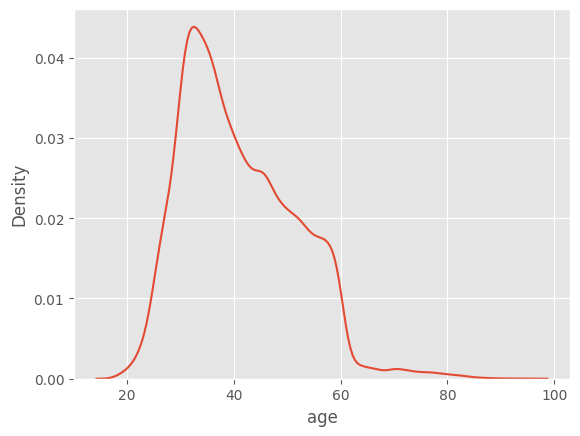

In [ ]:
sns.kdeplot(df_train['age'])

RUMPANG 10 = NORMALISASI

melakukan normalisasi pada kolom 'age' menggunakan MinMaxScaler.

In [ ]:
# MinMax Scaler for Normalization df_train
from sklearn.preprocessing import MinMaxScaler

scaler_age = MinMaxScaler()
df_train['pp_age_norm'] = scaler_age.fit_transform(df_train[['age']])
df_train[['age', 'pp_age_norm']].describe()


,age,pp_age_norm
count,45211.000000,45211.000000
mean,40.936210,0.297873
std,10.618762,0.137906
min,18.000000,0.000000
25%,33.000000,0.194805
50%,39.000000,0.272727
75%,48.000000,0.389610
max,95.000000,1.000000


In [ ]:
# MinMax Scaler for Normalization df_test
df_test['pp_age_norm'] = scaler_age.transform(df_test[['age']])
df_test[['age', 'pp_age_norm']].describe()

,age,pp_age_norm
count,4521.000000,4521.000000
mean,41.170095,0.300910
std,10.576211,0.137353
min,19.000000,0.012987
25%,33.000000,0.194805
50%,39.000000,0.272727
75%,49.000000,0.402597
max,87.000000,0.896104


#### Campaign

`campaign` has outliers. Investigating highest 50 data, it seems outliers happen naturally (no sudden jump, balance increase gradually). Number of outlier ~ 3K records
<br>
<br>
After consideration, for `campaign` we will:
* not remove outlier, as it can occur naturally
* use Feature Transformation - MinMax Scaler so algorithm will treat all features fairly

In [ ]:
df_train.campaign.sort_values().tail(50) # Outlier terjadi secara natural (tidak ada sudden jump)

,campaign
11394,31
18430,31
18612,31
3483,32
3529,32
3331,32
8238,32
23567,32
8547,32
4020,32


In [ ]:
Q1 = df_train['campaign'].quantile(0.25)
Q3 = df_train['campaign'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR
df_train['campaign'][(df_train['campaign'] < low_limit) | (df_train['campaign'] > high_limit)].describe()

,campaign
count,3064.000000
mean,11.483355
std,6.021215
min,7.000000
25%,8.000000
50%,9.000000
75%,13.000000
max,63.000000


In [ ]:
df_train['campaign'].describe()

,campaign
count,45211.000000
mean,2.763841
std,3.098021
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,63.000000


In [ ]:
# MinMax Scaler for Normalization df_train
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_train['pp_campaign_norm'] = MinMaxScaler().fit_transform(df_train['campaign'].values.reshape(len(df_train),1))
print(df_train[['campaign','pp_campaign_norm']].describe())
print('')

           campaign  pp_campaign_norm
count  45211.000000      45211.000000
mean       2.763841          0.028449
std        3.098021          0.049968
min        1.000000          0.000000
25%        1.000000          0.000000
50%        2.000000          0.016129
75%        3.000000          0.032258
max       63.000000          1.000000



In [ ]:
# MinMax Scaler for Normalization df_test
fit = MinMaxScaler().fit(df_train['campaign'].values.reshape(len(df_train),1)) # fit using parameters from df_train
df_test['pp_campaign_norm'] = fit.transform(df_test['campaign'].values.reshape(len(df_test),1))
print(df_test[['campaign','pp_campaign_norm']].describe())
print('')

          campaign  pp_campaign_norm
count  4521.000000       4521.000000
mean      2.793630          0.028930
std       3.109807          0.050158
min       1.000000          0.000000
25%       1.000000          0.000000
50%       2.000000          0.016129
75%       3.000000          0.032258
max      50.000000          0.790323



#### Pdays

`pdays` will be engineered to represent recency. Before doing so, we changed -1 value to 999. Not contacted client (was -1), will be assumed to have been contacted 999 days ago

In [ ]:
df_train.loc[(df_train.pdays == -1),"pdays"] = 999
df_train['pdays'][df_train['pdays']!=999].describe()

,pdays
count,8257.000000
mean,224.577692
std,115.344035
min,1.000000
25%,133.000000
50%,194.000000
75%,327.000000
max,871.000000


In [ ]:
def segment(x) :
    if x['pdays'] <= 133 :
        hasil = 3
    elif x['pdays'] <= 194 :
        hasil = 2
    elif x['pdays'] <= 327 :
        hasil = 1
    else:
        hasil = 0
    return hasil

df_train['recency_pdays'] = df_train.apply(lambda x : segment(x), axis=1)
df_test['recency_pdays'] = df_test.apply(lambda x : segment(x), axis=1)

In [ ]:
df_train['recency_pdays'].value_counts()

,count
recency_pdays,
0,39014
3,2084
1,2068
2,2045


In [ ]:
df_test['recency_pdays'].value_counts()

,count
recency_pdays,
0,3911
2,220
3,201
1,189


#### Previous

* `previous` will be used to generate feature `ever_contacted` (before), with `previous` > 0 resulting in `ever_contacted` = 1
* this feature has 1 outlier (value = 275), will be encoded to second highest value
* this feature will then undergo Feature Transformation - MinMax Scaler so algorithm will treat all features fairly

In [ ]:
df_train[df_train['pdays']==999]['previous'].value_counts()

,count
previous,
0,36954


In [ ]:
df_train[df_train['previous']==0]['pdays'].value_counts()

,count
pdays,
999,36954


In [ ]:
df_train[df_train['previous']!=0]['pdays'].describe()

,pdays
count,8257.000000
mean,224.577692
std,115.344035
min,1.000000
25%,133.000000
50%,194.000000
75%,327.000000
max,871.000000


In [ ]:
df_train[df_train['previous']!=275]['previous'].max()

58

In [ ]:
df_train.previous.sort_values().tail(50) # terdapat outlier '275', sudden jump

,previous
44147,22
31727,22
37003,22
38770,22
37151,22
29481,23
38043,23
44367,23
34944,23
37248,23


In [ ]:
def segment(x) :
    if x['previous'] == 0 :
        hasil = 0
    elif x['previous'] > 0  :
        hasil = 1
    return hasil

df_train['ever_contacted'] = df_train.apply(lambda x : segment(x), axis=1)
df_test['ever_contacted'] = df_test.apply(lambda x : segment(x), axis=1)

In [ ]:
# Hard code handling outlier hanya untuk df_train (df_test jangan dihandling outlier)
df_train.loc[(df_train.previous == 275),"previous"] = 58

In [ ]:
# MinMax Scaler for Normalization df_train
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_train['pp_previous_norm'] = MinMaxScaler().fit_transform(df_train['previous'].values.reshape(len(df_train),1))
print(df_train[['previous','pp_previous_norm']].describe())
print('')

           previous  pp_previous_norm
count  45211.000000      45211.000000
mean       0.575524          0.009923
std        1.926927          0.033223
min        0.000000          0.000000
25%        0.000000          0.000000
50%        0.000000          0.000000
75%        0.000000          0.000000
max       58.000000          1.000000



In [ ]:
# MinMax Scaler for Normalization df_test
fit = MinMaxScaler().fit(df_train['previous'].values.reshape(len(df_train),1)) # fit using parameters from df_train
df_test['pp_previous_norm'] = fit.transform(df_test['previous'].values.reshape(len(df_test),1))
print(df_test[['previous','pp_previous_norm']].describe())
print('')

          previous  pp_previous_norm
count  4521.000000       4521.000000
mean      0.542579          0.009355
std       1.693562          0.029199
min       0.000000          0.000000
25%       0.000000          0.000000
50%       0.000000          0.000000
75%       0.000000          0.000000
max      25.000000          0.431034




### D. Preprocess Categorical Data

#### Label Encoding

In [ ]:
# Label Encoding - df_train (untuk feature dengan distinct values 2, atau tipe ordinal)

# Encoding - Education (Tipe ordinal - punya urutan)
df_train.loc[(df_train.education == "tertiary"),"education"] = 2
df_train.loc[(df_train.education == "secondary") ,"education"] = 1
df_train.loc[(df_train.education == "primary"),"education"] = 0

# Encoding - Default
df_train.loc[(df_train.default == "yes"),"default"] = 1
df_train.loc[(df_train.default == "no") ,"default"] = 0

# Encoding - Housing
df_train.loc[(df_train.housing == "yes"),"housing"] = 1
df_train.loc[(df_train.housing == "no") ,"housing"] = 0

# Encoding - Loan
df_train.loc[(df_train.loan == "yes"),"loan"] = 1
df_train.loc[(df_train.loan == "no") ,"loan"] = 0

# Encoding - Contact
df_train.loc[(df_train.contact == "telephone"),"contact"] = 1
df_train.loc[(df_train.contact == "cellular") ,"contact"] = 0

# Encoding - Poutcome
df_train.loc[(df_train.poutcome == "success"),"poutcome_success"] = 1
df_train.loc[(df_train.poutcome == "unknown") ,"poutcome_success"] = 0
df_train.loc[(df_train.poutcome == "failure") ,"poutcome_success"] = 0
df_train.loc[(df_train.poutcome == "other") ,"poutcome_success"] = 0

# Encoding - Subscribed
df_train.loc[(df_train.subscribed == "yes"),"subscribed"] = 1
df_train.loc[(df_train.subscribed == "no") ,"subscribed"] = 0

# Adjusting data type
df_train.education = df_train.education.astype(int)
df_train.default = df_train.default.astype(int)
df_train.housing = df_train.housing.astype(int)
df_train.loan = df_train.loan.astype(int)
df_train.contact = df_train.contact.astype(int)
df_train.poutcome_success = df_train.poutcome_success.astype(int)
df_train.subscribed = df_train.subscribed.astype(int)

In [ ]:
# Label Encoding - df_test (untuk feature dengan distinct values 2, atau tipe ordinal)

# Encoding - Education (Tipe ordinal - punya urutan)
df_test.loc[(df_test.education == "tertiary"),"education"] = 2
df_test.loc[(df_test.education == "secondary") ,"education"] = 1
df_test.loc[(df_test.education == "primary"),"education"] = 0

# Encoding - Default
df_test.loc[(df_test.default == "yes"),"default"] = 1
df_test.loc[(df_test.default == "no") ,"default"] = 0

# Encoding - Housing
df_test.loc[(df_test.housing == "yes"),"housing"] = 1
df_test.loc[(df_test.housing == "no") ,"housing"] = 0

# Encoding - Loan
df_test.loc[(df_test.loan == "yes"),"loan"] = 1
df_test.loc[(df_test.loan == "no") ,"loan"] = 0

# Encoding - Contact
df_test.loc[(df_test.contact == "telephone"),"contact"] = 1
df_test.loc[(df_test.contact == "cellular") ,"contact"] = 0

# Encoding - Poutcome
df_test.loc[(df_test.poutcome == "success"),"poutcome_success"] = 1
df_test.loc[(df_test.poutcome == "unknown") ,"poutcome_success"] = 0
df_test.loc[(df_test.poutcome == "failure") ,"poutcome_success"] = 0
df_test.loc[(df_test.poutcome == "other") ,"poutcome_success"] = 0

# Encoding - Subscribed
df_test.loc[(df_test.subscribed == "yes"),"subscribed"] = 1
df_test.loc[(df_test.subscribed == "no") ,"subscribed"] = 0

# Adjusting Data Type
df_test.education = df_test.education.astype(int)
df_test.default = df_test.default.astype(int)
df_test.housing = df_test.housing.astype(int)
df_test.loan = df_test.loan.astype(int)
df_test.contact = df_test.contact.astype(int)
df_test.poutcome_success = df_test.poutcome_success.astype(int)
df_test.subscribed = df_test.subscribed.astype(int)

In [ ]:
df_test['contact'].value_counts()

,count
contact,
0,4220
1,301


#### One Hot Encoding

In [ ]:
# Marital Status

df_train[['marital_divorced','marital_married','marital_single']] = pd.get_dummies(df_train['marital'],prefix='marital')
df_test[['marital_divorced','marital_married','marital_single']] = pd.get_dummies(df_test['marital'],prefix='marital')

In [ ]:
# Job - df_train

# Job Group (Feature Extraction - Job Group first to reduce distinct values, some jobs are similar)
df_train.loc[df_train['job']=='blue-collar', 'job_group'] = 'blue_collar'
df_train.loc[df_train['job']=='technician', 'job_group'] = 'blue_collar'
df_train.loc[df_train['job']=='admin.', 'job_group'] = 'blue_collar'
df_train.loc[df_train['job']=='services', 'job_group'] = 'blue_collar'
df_train.loc[df_train['job']=='housemaid', 'job_group'] = 'blue_collar'
df_train.loc[df_train['job']=='management', 'job_group'] = 'management'
df_train.loc[df_train['job']=='self-employed', 'job_group'] = 'entrepreneur'
df_train.loc[df_train['job']=='entrepreneur', 'job_group'] = 'entrepreneur'
df_train.loc[df_train['job']=='unemployed', 'job_group'] = 'unemployed'
df_train.loc[df_train['job']=='student', 'job_group'] = 'student'
df_train.loc[df_train['job']=='retired', 'job_group'] = 'retired'

# OHE
df_train[['job_blue_collar','job_entrepreneur','job_management','job_retired','job_student','job_unemployed']] = pd.get_dummies(df_train['job_group'],prefix='job')

In [ ]:
# Job - df_test

# Job Group (Feature Extraction - Job Group first to reduce distinct values, some jobs are similar)
df_test.loc[df_test['job']=='blue-collar', 'job_group'] = 'blue_collar'
df_test.loc[df_test['job']=='technician', 'job_group'] = 'blue_collar'
df_test.loc[df_test['job']=='admin.', 'job_group'] = 'blue_collar'
df_test.loc[df_test['job']=='services', 'job_group'] = 'blue_collar'
df_test.loc[df_test['job']=='housemaid', 'job_group'] = 'blue_collar'
df_test.loc[df_test['job']=='management', 'job_group'] = 'management'
df_test.loc[df_test['job']=='self-employed', 'job_group'] = 'entrepreneur'
df_test.loc[df_test['job']=='entrepreneur', 'job_group'] = 'entrepreneur'
df_test.loc[df_test['job']=='unemployed', 'job_group'] = 'unemployed'
df_test.loc[df_test['job']=='student', 'job_group'] = 'student'
df_test.loc[df_test['job']=='retired', 'job_group'] = 'retired'

# OHE
df_test[['job_blue_collar','job_entrepreneur','job_management','job_retired','job_student','job_unemployed']] = pd.get_dummies(df_test['job_group'],prefix='job')

In [ ]:
df_train['job_group'].value_counts()

,count
job_group,
blue_collar,28143
management,9497
entrepreneur,3066
retired,2264
unemployed,1303
student,938


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               45211 non-null  int64  
 1   job               45211 non-null  object 
 2   marital           45211 non-null  object 
 3   education         45211 non-null  int64  
 4   default           45211 non-null  int64  
 5   balance           45211 non-null  int64  
 6   housing           45211 non-null  int64  
 7   loan              45211 non-null  int64  
 8   contact           45211 non-null  int64  
 9   day               45211 non-null  int64  
 10  month             45211 non-null  object 
 11  duration          45211 non-null  int64  
 12  campaign          45211 non-null  int64  
 13  pdays             45211 non-null  int64  
 14  previous          45211 non-null  int64  
 15  poutcome          45211 non-null  object 
 16  subscribed        45211 non-null  int64 

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               4521 non-null   int64  
 1   job               4521 non-null   object 
 2   marital           4521 non-null   object 
 3   education         4521 non-null   int64  
 4   default           4521 non-null   int64  
 5   balance           4521 non-null   int64  
 6   housing           4521 non-null   int64  
 7   loan              4521 non-null   int64  
 8   contact           4521 non-null   int64  
 9   day               4521 non-null   int64  
 10  month             4521 non-null   object 
 11  duration          4521 non-null   int64  
 12  campaign          4521 non-null   int64  
 13  pdays             4521 non-null   int64  
 14  previous          4521 non-null   int64  
 15  poutcome          4521 non-null   object 
 16  subscribed        4521 non-null   int64  


### E. Feature Selection

In [ ]:
'# df_train.drop(columns = [["duration",]],inplace = True)'

'# df_train.drop(columns = [["duration",]],inplace = True)'

In [ ]:
# First Iteration, dropping original features
df_train_fin1 = df_train[['education',
                         'default',
                         'housing',
                         'loan',
                         'contact',
                         'poutcome_success',
                         'subscribed',
                         'pp_balance_norm',
                         'overdraft_debt',
                         'pp_age_norm',
                         'pp_campaign_norm',
                         'recency_pdays',
                         'ever_contacted',
                         'pp_previous_norm',
                         'marital_divorced',
                         'marital_married',
                         'marital_single',
                         'job_blue_collar',
                         'job_entrepreneur',
                         'job_management',
                         'job_retired',
                         'job_student',
                         'job_unemployed'
]]

RUMPANG 11 : HEATMAP CORR

membuat diagram heatmap dengan output yang telah ditentukan. Hint -> cmap = "YlGnBu".

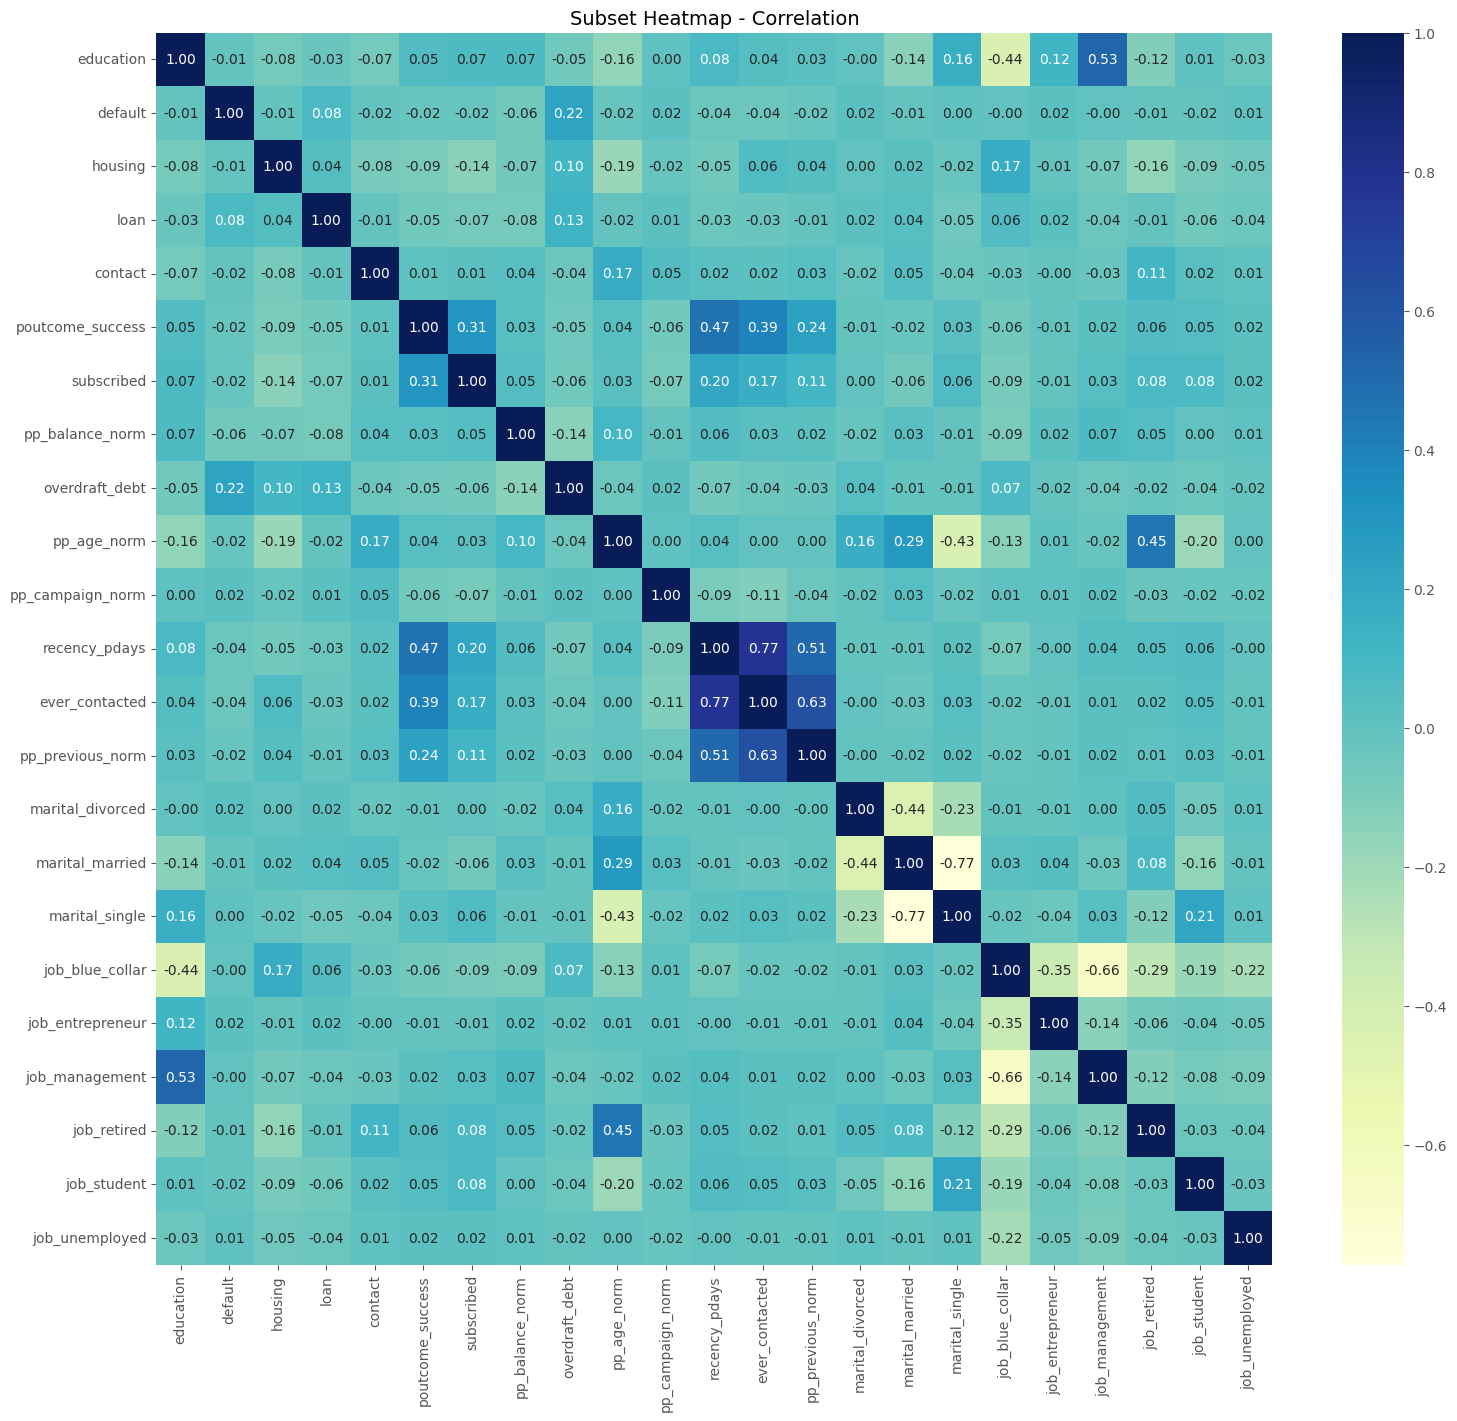

In [ ]:
subset_cols = [
    'education', 'default', 'housing', 'loan', 'contact',
    'poutcome_success', 'subscribed', 'pp_balance_norm',
    'overdraft_debt', 'pp_age_norm', 'pp_campaign_norm',
    'recency_pdays', 'ever_contacted', 'pp_previous_norm',
    'marital_divorced', 'marital_married', 'marital_single',
    'job_blue_collar', 'job_entrepreneur', 'job_management',
    'job_retired', 'job_student', 'job_unemployed'
]

# Hitung korelasi hanya pada kolom tersebut
corr_subset = df_train[subset_cols].corr()

# Buat heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(corr_subset, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Subset Heatmap - Correlation", fontsize=14)
plt.show()

Insights First Iteration:
* Strong positive correlation (0.51-0.77) between `ever_contacted`, `recency_pdays` and `pp_previous_norm`. Precursor of these features showed mild correlation during EDA stage. Since `ever_contacted` is less modified and pretty straightforward, it will be retained. `recency_pdays` and `pp_previous_norm` to be dropped
* Strong negative correlation (-0.77) between `marital_married` and `marital_single`, 3 marital status features will be changed to `is_married`
* Strong negative correlation (-0.66) between `marital_married` and `marital_single`, will be kept as is because their correlations with `subscribed` differs in magnitude and direction

In [ ]:
# Second Iteration, dropping original features

# Label Encoding for Marital
df_train.loc[(df_train.marital == "married"),"is_married"] = 1
df_train.loc[(df_train.marital == "single") ,"is_married"] = 0
df_train.loc[(df_train.marital == "divorced"),"is_married"] = 0

df_train.is_married = df_train.is_married.astype(int)

df_train_fin2 = df_train[['education',
                         'default',
                         'housing',
                         'loan',
                         'contact',
                         'poutcome_success',
                         'subscribed',
                         'pp_balance_norm',
                         'overdraft_debt',
                         'pp_age_norm',
                         'pp_campaign_norm',
                        #  'recency_pdays',
                         'ever_contacted',
                        #  'pp_previous_norm',
                        #  'marital_divorced',
                        #  'marital_married',
                        #  'marital_single',
                         'is_married',
                         'job_blue_collar',
                         'job_entrepreneur',
                         'job_management',
                         'job_retired',
                         'job_student',
                         'job_unemployed'
]]

RUMPANG 11 : HEATMAP CORR

membuat diagram heatmap dengan output yang telah ditentukan. Hint -> cmap = "YlGnBu".

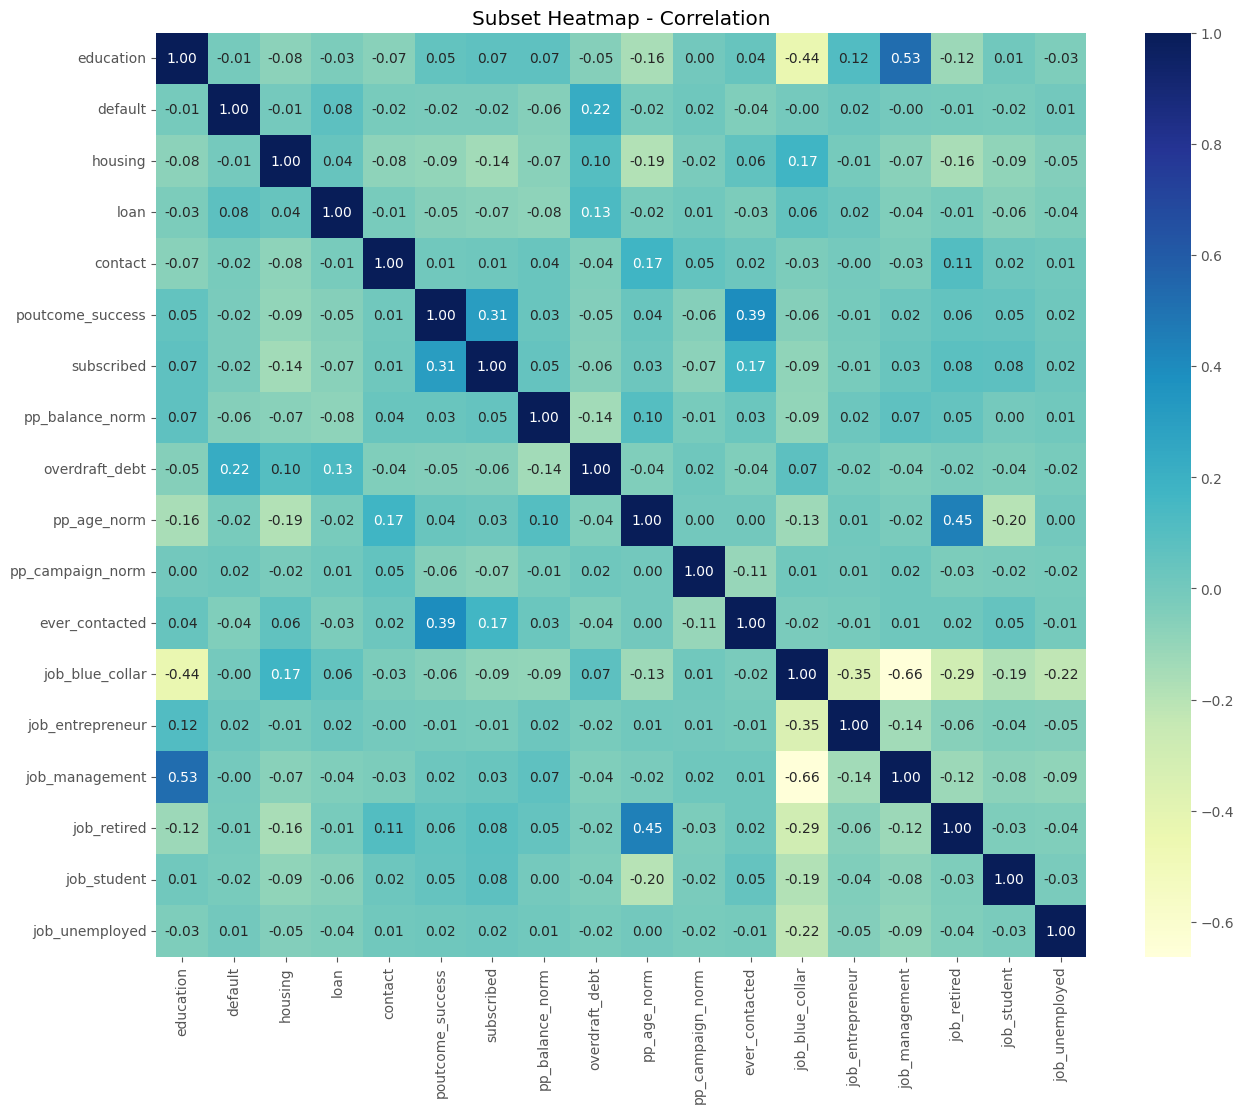

In [ ]:
subset_cols = [
    'education', 'default', 'housing', 'loan', 'contact',
    'poutcome_success', 'subscribed', 'pp_balance_norm',
    'overdraft_debt', 'pp_age_norm', 'pp_campaign_norm',
    'ever_contacted',
    'job_blue_collar', 'job_entrepreneur', 'job_management',
    'job_retired', 'job_student', 'job_unemployed'
]

# Hitung korelasi hanya pada kolom tersebut
corr_subset = df_train[subset_cols].corr()

# Buat heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_subset, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Subset Heatmap - Correlation")
plt.show()


Insights Heatmap Second Iteration: No highly correlated features that can be simplified anymore. Will proceed using this dataset for modeling

In [ ]:
# Creating df_train_final
df_train_fin = df_train_fin2

In [ ]:
# Creating df_test_final

# Label Encoding for Marital
df_test.loc[(df_test.marital == "married"),"is_married"] = 1
df_test.loc[(df_test.marital == "single") ,"is_married"] = 0
df_test.loc[(df_test.marital == "divorced"),"is_married"] = 0

df_test.is_married = df_test.is_married.astype(int)

df_test_fin = df_test[['education',
                         'default',
                         'housing',
                         'loan',
                         'contact',
                         'poutcome_success',
                         'subscribed',
                         'pp_balance_norm',
                         'overdraft_debt',
                         'pp_age_norm',
                         'pp_campaign_norm',
                        #  'recency_pdays',
                         'ever_contacted',
                        #  'pp_previous_norm',
                        #  'marital_divorced',
                        #  'marital_married',
                        #  'marital_single',
                         'is_married',
                         'job_blue_collar',
                         'job_entrepreneur',
                         'job_management',
                         'job_retired',
                         'job_student',
                         'job_unemployed'
]]

In [ ]:
print(df_train_fin.shape, df_test_fin.shape)

(45211, 19) (4521, 19)


In [ ]:
df_train_fin.head()

,education,default,housing,loan,contact,poutcome_success,subscribed,pp_balance_norm,overdraft_debt,pp_age_norm,pp_campaign_norm,ever_contacted,is_married,job_blue_collar,job_entrepreneur,job_management,job_retired,job_student,job_unemployed
0,2,0,1,0,0,0,0,0.020984,0,0.519481,0.0,0,1,False,False,True,False,False,False
1,1,0,1,0,0,0,0,0.000284,0,0.337662,0.0,0,0,True,False,False,False,False,False
2,1,0,1,1,0,0,0,0.000020,0,0.194805,0.0,0,1,False,True,False,False,False,False
3,1,0,1,0,0,0,0,0.014746,0,0.376623,0.0,0,1,True,False,False,False,False,False
4,1,0,0,0,0,0,0,0.000010,0,0.194805,0.0,0,0,True,False,False,False,False,False


In [ ]:
df_train_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   education         45211 non-null  int64  
 1   default           45211 non-null  int64  
 2   housing           45211 non-null  int64  
 3   loan              45211 non-null  int64  
 4   contact           45211 non-null  int64  
 5   poutcome_success  45211 non-null  int64  
 6   subscribed        45211 non-null  int64  
 7   pp_balance_norm   45211 non-null  float64
 8   overdraft_debt    45211 non-null  int64  
 9   pp_age_norm       45211 non-null  float64
 10  pp_campaign_norm  45211 non-null  float64
 11  ever_contacted    45211 non-null  int64  
 12  is_married        45211 non-null  int64  
 13  job_blue_collar   45211 non-null  bool   
 14  job_entrepreneur  45211 non-null  bool   
 15  job_management    45211 non-null  bool   
 16  job_retired       45211 non-null  bool  

In [ ]:
df_test_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   education         4521 non-null   int64  
 1   default           4521 non-null   int64  
 2   housing           4521 non-null   int64  
 3   loan              4521 non-null   int64  
 4   contact           4521 non-null   int64  
 5   poutcome_success  4521 non-null   int64  
 6   subscribed        4521 non-null   int64  
 7   pp_balance_norm   4521 non-null   float64
 8   overdraft_debt    4521 non-null   int64  
 9   pp_age_norm       4521 non-null   float64
 10  pp_campaign_norm  4521 non-null   float64
 11  ever_contacted    4521 non-null   int64  
 12  is_married        4521 non-null   int64  
 13  job_blue_collar   4521 non-null   bool   
 14  job_entrepreneur  4521 non-null   bool   
 15  job_management    4521 non-null   bool   
 16  job_retired       4521 non-null   bool   


### F. Handle Class Imbalance

In [ ]:
from imblearn import under_sampling, over_sampling

In [ ]:
# pembuatan binary label target
# Terdapat class_imbalance dengan degree moderate (1-20%)
df_train_fin['y_class'] = df_train_fin['subscribed'] > 0
df_train_fin['y_class'].value_counts(normalize=True)

/tmp/ipython-input-78-210959066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_fin['y_class'] = df_train_fin['subscribed'] > 0


,proportion
y_class,
False,0.883015
True,0.116985


In [ ]:
X = df_train_fin[[col for col in df_train_fin.columns if col not in ['y_class','subscribed']]].values
y = df_train_fin['y_class'].values

print(X.shape)
print(y.shape)

(45211, 18)
(45211,)


RUMPANG 12 : HANDLE IMBALANCE CLASS

Handle imbalance data meggunakan under_sampling dan over_sampling. Variabel output = X_under, y_under, X_over, y_over, X_over_SMOTE, dan y_over_SMOTE.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

X = df_train_fin.drop(columns='subscribed')
y = df_train_fin['subscribed'].astype(bool)
y = pd.Series(y.values)

# Undersampling
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_under, y_under = rus.fit_resample(X, y)
y_under = pd.Series(y_under.values)

# Oversampling
ros = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_over, y_over = ros.fit_resample(X, y)
y_over = pd.Series(y_over.values)

# SMOTE
sm = SMOTE(sampling_strategy=0.5, random_state=42)
X_over_SMOTE, y_over_SMOTE = sm.fit_resample(X, y)
y_over_SMOTE = pd.Series(y_over_SMOTE.values)


In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
False    39922
True      5289
Name: count, dtype: int64


UNDERSAMPLING
False    10578
True      5289
Name: count, dtype: int64


OVERSAMPLING
False    39922
True     19961
Name: count, dtype: int64


SMOTE
False    39922
True     19961
Name: count, dtype: int64


In [ ]:
# importing data
df_train_fin.to_csv('df_train_fin.csv',index=False)

In [ ]:
# importing data
df_test_fin.to_csv('df_test_fin.csv',index=False)